# Analiza zależności między emisją CO2 i średnią roczną temperaturą

Dane zostały pobrane ze strony keggle.com <br/>
[CO2 and GHG emission data](https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data/kernels) <br/>
[Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=29)<br/>

Następnie zostały przerzucone z formatu .csv do bazy SQLite. 
Wstępne oczyszczanie danych nie jest w tym zbiorze potrzebne.

W celu analizy danych używamy środowiska `jupyter` oraz bibliotek: `pandas`, `seaborn`, `sqlite3`, `matplotlib`

## Wczytywanie danych

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [3]:
!ls

Projekt Statystyka.ipynb
Projekt Statystyka.pdf
Untitled.pdf
climate-change-earth-surface-temperature-data
db_link
emission data.csv
emission_to_sql.py
podział_pracy.pdf
project_data.db
tempretures_to_sql.py


In [4]:
emission_data = None
global_land_temperatures_by_city = None
global_land_temperatures_by_country = None
global_land_temperatures_by_major_city = None
global_land_temperatures_by_state = None
global_temperatures = None

with sqlite3.connect('project_data.db') as conn:
    emission_data = pd.read_sql('select * from emissions', conn)
    global_temperatures = pd.read_sql('select * from GlobalTemperatures', conn)

Zmienna `emission_data` zawiera `pandas.DataFrame` zawierająca dane o emisji CO2 przez każdy kraj w latach `1751 - 2017`

In [5]:
emission_data

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
227,World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
228,Yemen,0,0,0,0,0,0,0,0,0,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08
229,Zambia,0,0,0,0,0,0,0,0,0,...,1.543919e+08,1.567982e+08,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08


In [24]:
emission_data[emission_data.Country.isin(["Belarus", "United States", "Poland", "Wallis and Futuna Islands", "China"])]

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
21,Belarus,0,0,0,0,0,0,0,0,0,...,3.496822e+09,3.558760e+09,3.622622e+09,3.685395e+09,3.749069e+09,3.813493e+09,3.877273e+09,3.936239e+09,3.996748e+09,4.058120e+09
45,China,0,0,0,0,0,0,0,0,0,...,1.160000e+11,1.240000e+11,1.320000e+11,1.420000e+11,1.510000e+11,1.610000e+11,1.710000e+11,1.810000e+11,1.900000e+11,2.000000e+11
167,Poland,0,0,0,0,0,0,0,0,0,...,2.395971e+10,2.427385e+10,2.460599e+10,2.493768e+10,2.526190e+10,2.558181e+10,2.588936e+10,2.619998e+10,2.652221e+10,2.684882e+10
220,United States,0,0,0,0,0,0,0,0,0,...,3.500000e+11,3.560000e+11,3.610000e+11,3.670000e+11,3.720000e+11,3.780000e+11,3.830000e+11,3.890000e+11,3.940000e+11,3.990000e+11
226,Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05


Zmienna `global_temperatures` zawiera średnie miesięczne wartości pomiarów temperatury w latach `1750 - 2015` wraz z niepewnościami.

In [5]:
global_temperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## Emisja CO2

Poniższy wykres przedstawia emisję <i><b>CO2</b></i> na świecie. <br/>
Możemy zauważyć wyraźny wzrost tego wskaźnika z upływem czasu

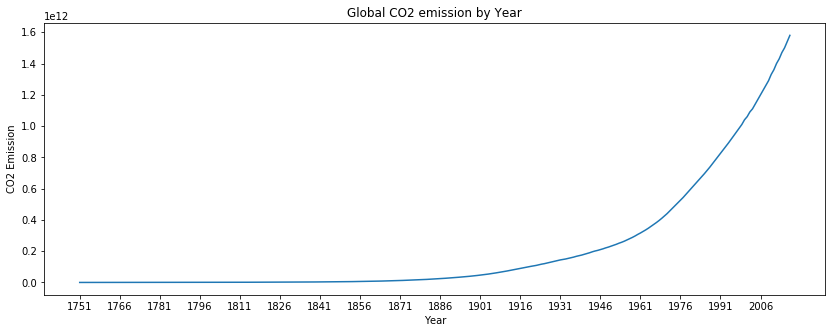

In [7]:
years = emission_data.columns[1:]

plt.figure(figsize=(14, 5))
plt.title('Global CO2 emission by Year')
sns.lineplot(x=years, y=np.squeeze(emission_data[emission_data.Country.isin(["World"])].values)[1:].astype(np.int64))
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
t = plt.xticks(years[::15])

Krótko możemy przeanalizować największe czynniki powodujące taki drastyczny wzrost.

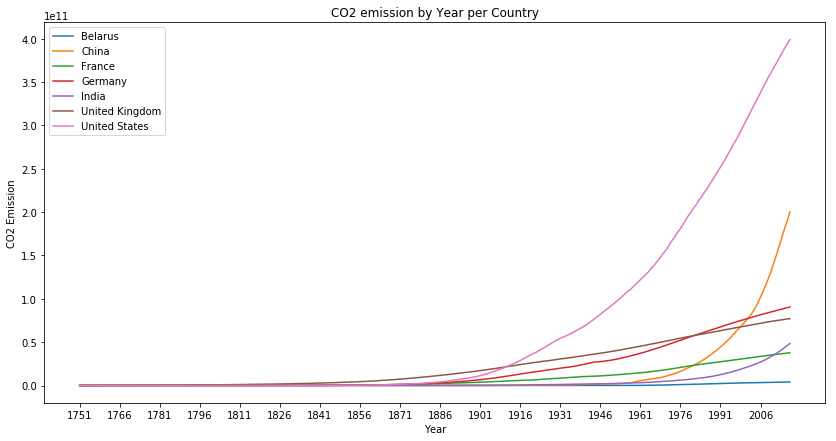

In [16]:
plt.figure(figsize=(14, 7))
plt.title('CO2 emission by Year per Country')
country_list = ["India", "France", "United States", "China", "Germany", "United Kingdom", "Poland", "Ukraine", "Wallis and Futuna Islands"]
for country_data in emission_data[emission_data.Country.isin(country_list)].values:
    sns.lineplot(x=years, y=country_data[1:].astype(np.int64), legend='brief', label=country_data[0])

plt.xlabel('Year')
plt.ylabel('CO2 Emission')
t = plt.xticks(years[::15])

Jak możemy zauważyć na powyższym wykresie głównymi emiterami __**CO2**__ są państwa wysokorozwinięte, może świadczy o zależności między emisją __**CO2**__ a rozwojem państwa?

## Globalne temperatury

In [26]:
temp = global_temperatures['LandAverageTemperature']
temp_upper = global_temperatures['LandAverageTemperature'] + global_temperatures['LandAverageTemperatureUncertainty']
temp_lower = global_temperatures['LandAverageTemperature'] - global_temperatures['LandAverageTemperatureUncertainty']

In [27]:
temps = global_temperatures[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty']]
temps['dt']=pd.to_datetime(temps.dt).dt.strftime('%d/%m/%Y')
temps['dt'] = temps.dt.apply(lambda row: row[6:])
mean_temp_by_year = temps.groupby('dt')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()
mean_temp_by_year_upper = mean_temp_by_year['LandAverageTemperature'] + mean_temp_by_year['LandAverageTemperatureUncertainty']
mean_temp_by_year_lower = mean_temp_by_year['LandAverageTemperature'] - mean_temp_by_year['LandAverageTemperatureUncertainty']

Na poniższym wykresie przedstawione są średnie wartości pomiarów rocznej temperatury wraz z niepewnościami pomiarowymi, wyliczonymi wyżej.

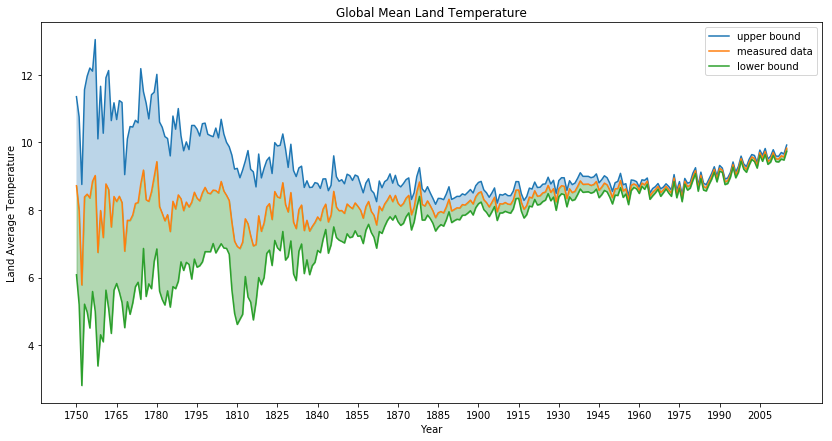

In [28]:
plt.figure(figsize=(14, 7))
plt.title('Global Mean Land Temperature')
sns.lineplot(x=mean_temp_by_year['dt'], y=mean_temp_by_year_upper, legend='brief', label='upper bound')
sns.lineplot(x=mean_temp_by_year['dt'], y=mean_temp_by_year['LandAverageTemperature'], legend='brief', label='measured data')
ax = sns.lineplot(x=mean_temp_by_year['dt'], y=mean_temp_by_year_lower, legend='brief', label='lower bound')
ax.fill_between(mean_temp_by_year['dt'], mean_temp_by_year_upper, mean_temp_by_year['LandAverageTemperature'], alpha=0.3)
ax.fill_between(mean_temp_by_year['dt'], mean_temp_by_year_lower, mean_temp_by_year['LandAverageTemperature'], color='green', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
t = plt.xticks(mean_temp_by_year['dt'][::15])

Jak możemy zauważyć dane historyczne są obarczone sporym błędem pomiarowym z tego powodu w dalszej analizie nie uwzględniamy danych do roku `1850` 

In [29]:
mean_temp_by_year_shorten = mean_temp_by_year.iloc[100:]
mean_temp_by_year_upper_shorten = mean_temp_by_year_upper[100:]
mean_temp_by_year_lower_shorten = mean_temp_by_year_lower[100:]
mean_temp_by_year_shorten

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
100,1850,7.900667,0.876417
101,1851,8.178583,0.881917
102,1852,8.100167,0.918250
103,1853,8.041833,0.835000
104,1854,8.210500,0.825667
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


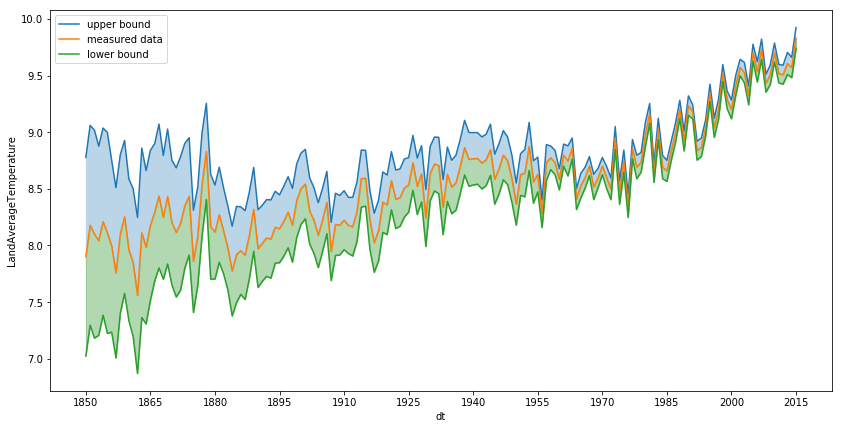

In [12]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=mean_temp_by_year_shorten['dt'], y=mean_temp_by_year_upper_shorten, legend='brief', label='upper bound')
sns.lineplot(x=mean_temp_by_year_shorten['dt'], y=mean_temp_by_year_shorten['LandAverageTemperature'], legend='brief', label='measured data')
ax = sns.lineplot(x=mean_temp_by_year_shorten['dt'], y=mean_temp_by_year_lower_shorten, legend='brief', label='lower bound')
ax.fill_between(mean_temp_by_year_shorten['dt'], mean_temp_by_year_upper_shorten, mean_temp_by_year_shorten['LandAverageTemperature'], alpha=0.3)
ax.fill_between(mean_temp_by_year_shorten['dt'], mean_temp_by_year_lower_shorten, mean_temp_by_year_shorten['LandAverageTemperature'], color='green', alpha=0.3)
t = plt.xticks(mean_temp_by_year_shorten['dt'][::15])

Powyższy wykres pokazuje wyraźny wzrost temperatury, który w ostatnim półwieczu znacząco przyspieszył. <br/>
<br/>

Możliwą przyczyną takiego zjawiska może być znaczący wzrost emisji __**CO2**__ na świecie. Z tego powodu w dalszej części projektu sprawdzamy czy istnieje **silna** korelacja między tymi danymi.

## Analiza zależności 

Aby sprawdzić czy zachodzi liniowa zależność danych, użyjemy regresji liniowej.<br/>
Dla zobrazowania tego użyjemy `seaborn.regplot` i funkcję `pandas.corr` dla zobrazowania krzywej dobranej regresją liniową i wyznaczenia wspólczynika korelacji odpowiednio.

Uwzględniając to, że __**CO2**__ wyemitowane w poprzednich latach także wpływa na stan obecny atmosfery (CO2 dość długo trzyma się w atmosferze), dane emisyjne kumulujemy:

In [13]:
emission_by_world = np.squeeze(emission_data[emission_data.Country.isin(["World"])].values)[1:-2].astype(np.int64)
emission_by_world = np.cumsum(emission_by_world)

In [14]:
emission_by_world = emission_by_world[(-mean_temp_by_year_shorten.shape[0]):]

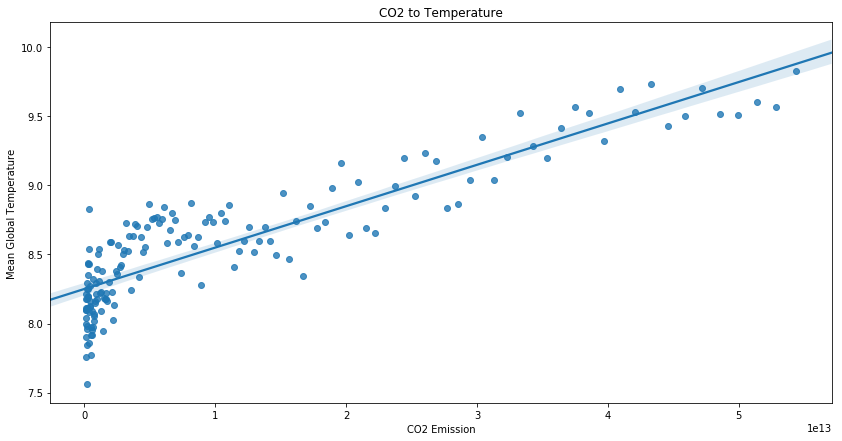

In [15]:
plt.figure(figsize=(14, 7))
plt.title('CO2 to Temperature')
p = sns.regplot(x=emission_by_world, y=mean_temp_by_year_shorten['LandAverageTemperature'])
plt.xlabel('CO2 Emission')
t = plt.ylabel('Mean Global Temperature')

In [16]:
mean_temp_by_year_shorten['LandAverageTemperature'].corr(pd.Series(emission_by_world))

0.32651878123923495

Powyższa analiza pokazała że zachodzi jedynie słaba zależność pomiędzy danymi. Co również mogło być spowodowan wcześniejszą decyzją o zmniejszeniu ilości danych. <br/><br/>
Poniżej sprawdzimy zależność uwzględniając również wcześniej usunięte dane temperaturowe.

In [17]:
emission_by_world = np.squeeze(emission_data[emission_data.Country.isin(["World"])].values)[1:-2].astype(np.int64)
emission_by_world = np.cumsum(emission_by_world)
#emission_by_world

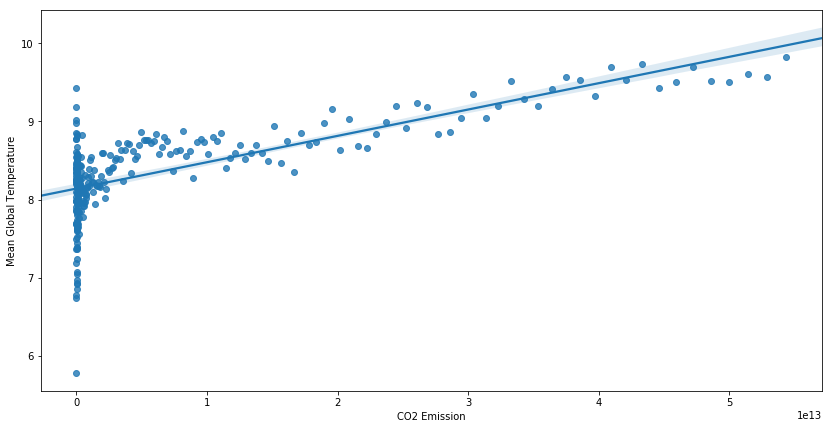

In [18]:
plt.figure(figsize=(14, 7))
p = sns.regplot(x=emission_by_world, y=mean_temp_by_year['LandAverageTemperature'][1:])
plt.xlabel('CO2 Emission')
t = plt.ylabel('Mean Global Temperature')

In [19]:
mean_temp_by_year['LandAverageTemperature'].corr(pd.Series(emission_by_world))

0.6926937358750206

Powyższy test pokazuje silną zaleźność danych, nie mniej jednak głobalne ocieplenie jest złożonym procesem, który nie może zależeć tylko od jednego parametru.